In [14]:
import numpy as np 
import pandas as pd 
#pd.set_option('float_format', '{:f}'.format)
pd.options.display.float_format = '{:,.2f}'.format
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
filename = "kickstarter-projects/ks-projects-201801.csv"
ks_df = pd.read_csv(filename)
ks_df.shape

(378661, 15)

In [16]:
ks_df = ks_df.dropna()
ks_df.shape

(374860, 15)

In [17]:
ks_df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,"1,000.00",2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,"1,533.95"
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,"30,000.00",2017-09-02 04:43:57,"2,421.00",failed,15,US,100.00,"2,421.00","30,000.00"
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,"45,000.00",2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,"45,000.00"
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,"5,000.00",2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,"5,000.00"
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,"19,500.00",2015-07-04 08:35:03,"1,283.00",canceled,14,US,"1,283.00","1,283.00","19,500.00"


In [18]:
ks_df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,"374,860.00","374,860.00","374,860.00","374,860.00","374,860.00","374,860.00","374,860.00"
mean,"1,074,652,355.55","49,522.99","9,750.54",106.69,"7,036.80","9,120.90","45,863.03"
std,"619,136,772.59","1,189,361.60","96,010.94",911.71,"78,640.16","91,319.69","1,158,767.37"
min,"5,971.00",0.01,0.00,0.00,0.00,0.00,0.01
25%,"538,063,323.00","2,000.00",31.00,2.00,16.98,31.00,"2,000.00"
50%,"1,075,289,160.00","5,500.00",620.00,12.00,394.76,624.50,"5,500.00"
75%,"1,610,137,350.75","16,500.00","4,080.00",57.00,"3,034.43","4,050.89","16,000.00"
max,"2,147,476,221.00","100,000,000.00","20,338,986.27","219,382.00","20,338,986.27","20,338,986.27","166,361,390.71"


In [6]:
avg_goal_per_project = ks_df.groupby("ID").sum()['usd_goal_real'].mean()
avg_goal_per_project

45863.02597164258

In [7]:
avg_pledged_per_project = ks_df.groupby("ID").sum()['usd_pledged_real'].mean()
avg_pledged_per_project

9120.898548951944

In [127]:
avg_pledged_per_project / avg_goal_per_project * 100

19.88725853935468

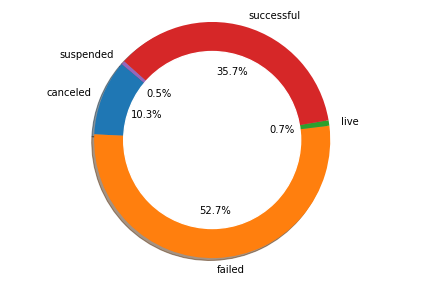

state
canceled       38757
failed        197611
live            2798
successful    133851
suspended       1843
Name: ID, dtype: int64

In [19]:
sizes = ks_df.ID.groupby(ks_df.state).count() 

labels = sizes.index

#colors = ["#E13F28", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B",]

#explode = (0.1,0.1,0.1,0.1,0.8)

# Create a pie chart
plt.pie(
    # using data total)arrests
    sizes,
    # with the labels being officer names
    labels = sizes.index,
    # with no shadows
    shadow = True,
    # with colors
    #colors = colors,
    # with one slide exploded out
    #explode = explode,
    # with the start angle at 90%
    startangle = 140,
    # with the percent listed as a fraction
    autopct = '%1.1f%%',
    )


centre_circle = plt.Circle((0,0),0.75,color='white', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


# View the plot drop above
plt.axis('equal')

# View the plot
plt.tight_layout()
plt.show()
sizes

In [ ]:
Next step: created a stack bar chart of main_category, which each bar showing the proportion of success/ failed projects 

In [28]:
ks_df.ID.groupby(ks_df.main_category).count() 

main_category
Art             28152
Comics          10819
Crafts           8809
Dance            3767
Design          30066
Fashion         22812
Film & Video    62696
Food            24599
Games           35225
Journalism       4754
Music           49530
Photography     10778
Publishing      39379
Technology      32562
Theater         10912
Name: ID, dtype: int64

In [29]:
list(ks_df)


['ID',
 'name',
 'category',
 'main_category',
 'currency',
 'deadline',
 'goal',
 'launched',
 'pledged',
 'state',
 'backers',
 'country',
 'usd pledged',
 'usd_pledged_real',
 'usd_goal_real']

In [30]:
I grouped it by 'position' and then calculated the frequency of 'rankvalue' for each position:

aggre= results.groupby(['position','rankvalue'])['position'].agg({'Frequency':'count'})


SyntaxError: invalid syntax (<ipython-input-30-95a55f99adf2>, line 1)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


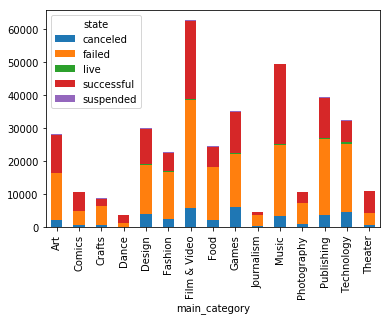

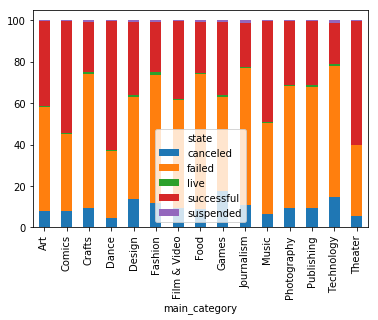

In [49]:
ks1 = ks_df.groupby(['main_category','state'])['state'].agg({'Frequency':'count'})

ks2 = ks1.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))

ks2

ks1.Frequency.unstack().plot.bar(stacked=True)

ks2.Frequency.unstack().plot.bar(stacked=True)


# Spare code used in early data exploration

In [60]:
ks_df.country.unique()

array(['GB', 'US', 'CA', 'AU', 'NO', 'IT', 'DE', 'IE', 'MX', 'ES', 'N,0"',
       'SE', 'FR', 'NL', 'NZ', 'CH', 'AT', 'DK', 'BE', 'HK', 'LU', 'SG',
       'JP'], dtype=object)

In [63]:
 np.where(pd.isnull(ks_df))

(array([   169,    328,    632, ..., 378434, 378585, 378588]),
 array([12, 12, 12, ..., 12, 12, 12]))

In [68]:
ks_df.iloc[[378588]]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
378588,999621278,Jeune auteur a besoin de vous!,Publishing,Publishing,EUR,2015-11-20,"1,600.00",2015-10-21 21:28:13,0.00,undefined,0,"N,0""",nan,0.00,"1,710.08"


In [86]:
ks_df.loc[ks_df['state'] == 'undefined'].shape

(3562, 15)

In [77]:
temp = ks_df[ks_df['usd pledged'].isnull()]

In [78]:
#temp.state.unique()

array(['undefined', 'successful', 'canceled', 'failed', 'suspended',
       'live'], dtype=object)

In [128]:
#temp.loc[temp['state'] != 'undefined']

In [82]:
temp.country.unique()

array(['N,0"'], dtype=object)

In [83]:
temp.backers.unique()

array([0])

In [89]:
temp.shape

(3797, 15)

In [97]:
temp_2 = ks_df.loc[ks_df['backers'] == 0]

In [95]:
ks_df.loc[ks_df['country'] == 'N,0"'].shape

(3797, 15)

In [99]:
ks_df_2 = ks_df.dropna()

In [129]:
#ks_df_2.head()

In [130]:
#ks_df_2.country.unique()